In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from ipywidgets import interact, IntSlider
from matplotlib.colors import ListedColormap
from pandas.plotting import andrews_curves, parallel_coordinates

Load the Iris Dataset

In [12]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [13]:
# Create DataFrame for visualization
iris_data = pd.DataFrame(X, columns=feature_names)
iris_data['species'] = pd.Categorical.from_codes(y, target_names)
iris_data['class'] = iris_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Visualizations – Pairplot

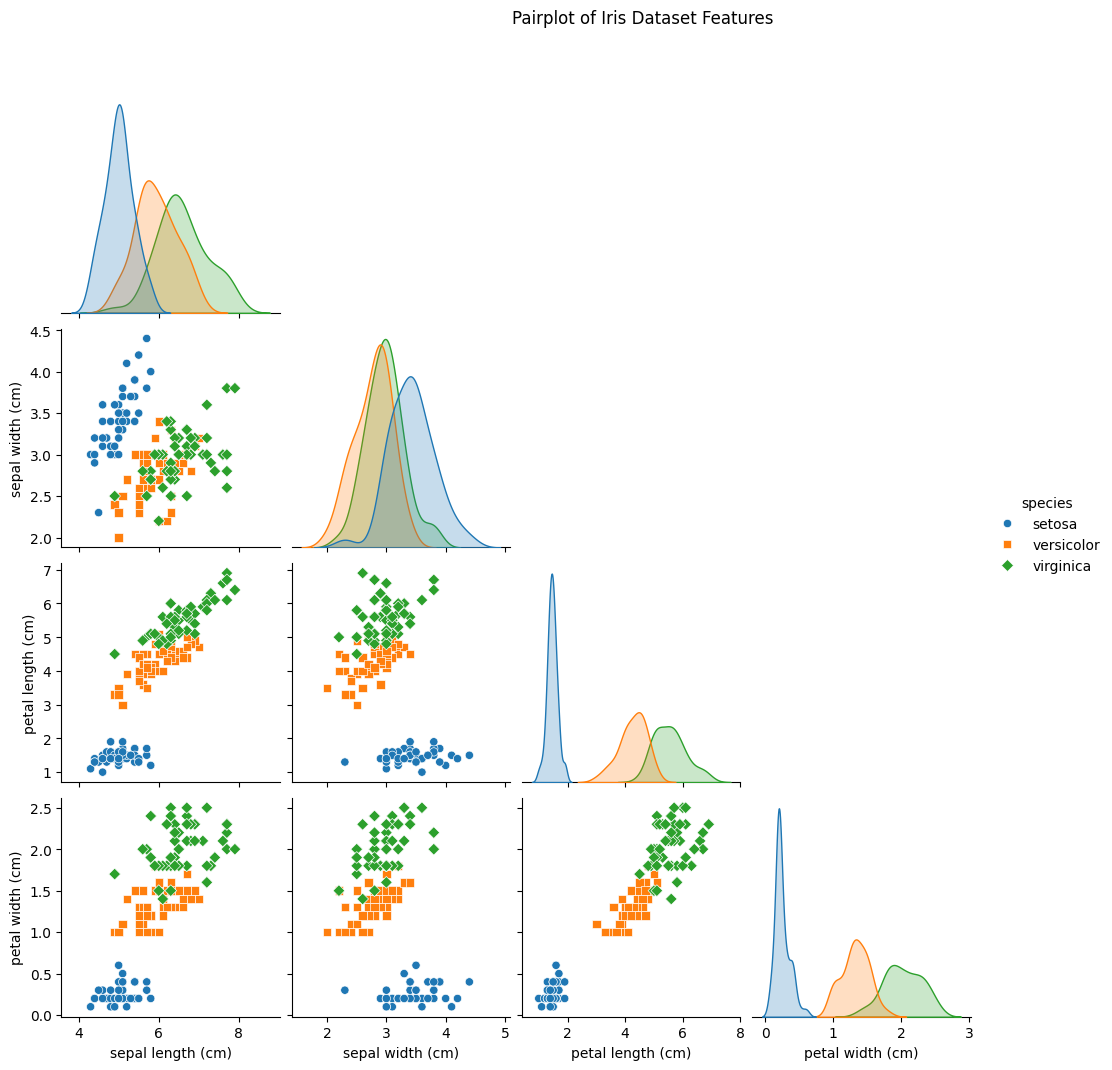

In [14]:
sns.pairplot(iris_data, hue='species', markers=["o", "s", "D"], corner=True)
plt.title('Pairplot of Iris Dataset Features', x=-0.5 ,y=4.5)
# hue is used to color the points by species
# markers are used to differentiate species visually
# corner=True avoids redundant plots in the upper triangle
# corner=True is useful for large datasets to avoid clutter and focus on the lower triangle because it contains all the necessary information
# Each subplot shows the relationship between two features, with different colors for each species.
plt.show()

Visualizations – Boxplot

<ipython-input-16-2807089110>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


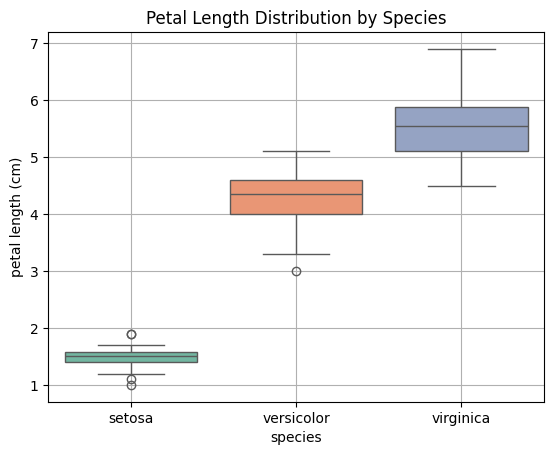

In [16]:
sns.boxplot(
    data=iris_data,
    x='species',
    y='petal length (cm)',
    palette="Set2"
)
plt.title("Petal Length Distribution by Species")
plt.grid(True)
# Add grid lines for easier comparison
plt.show()

Visualizations – Pairplot, Boxplot, Heatmap

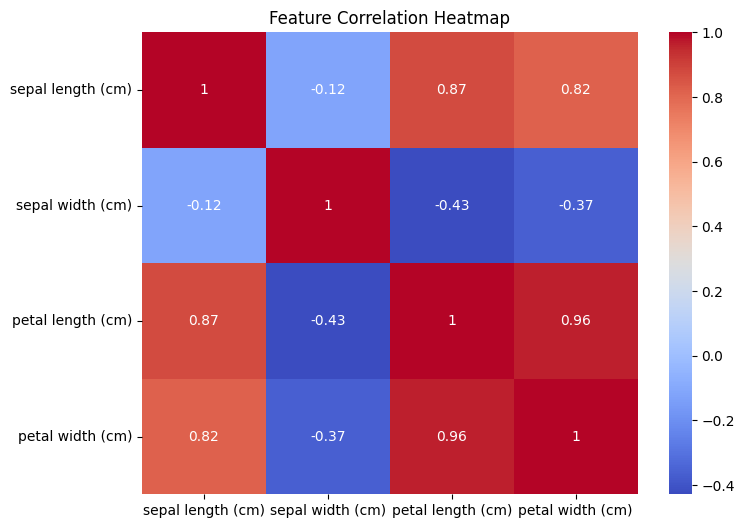

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris_data.iloc[:, :-2].corr(), annot=True, cmap="coolwarm")
# - We only select numeric columns (drop species/class) using iloc[:, :-2]
# - .corr() computes pairwise linear correlation between features
# - annot=True shows the correlation values on the heatmap
# - cmap='coolwarm' visually distinguishes negative and positive correlations
plt.title("Feature Correlation Heatmap")
plt.show()

PCA Visualization

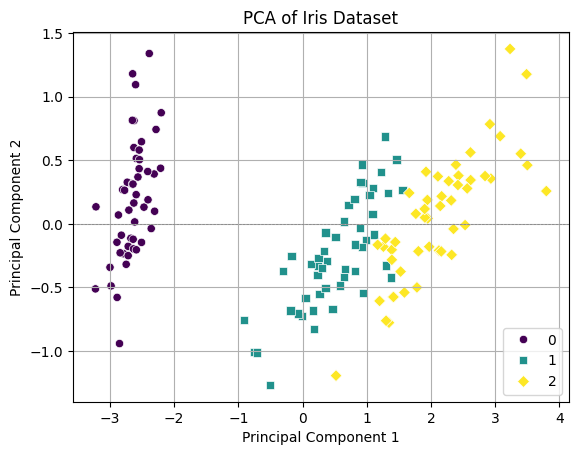

In [59]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='viridis', style=y, markers=["o", "s", "D"])
# x=X_pca[:,0]: Use the first principal component (PC1) as the x-axis.
# y=X_pca[:,1]: Use the second principal component (PC2) as the y-axis.
# hue=y: Color each point based on its species (target class). Helps distinguish classes visually.
# palette='viridis': Use the 'viridis' colormap – perceptually uniform and colorblind-friendly.
# style=y: Assign a different marker style for each class to improve visual distinction, especially in grayscale.
# markers=["o", "s", "D"]: Set marker shapes to circle ("o"), square ("s"), and diamond ("D") for the three species.
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

Andrews Curves Visualization

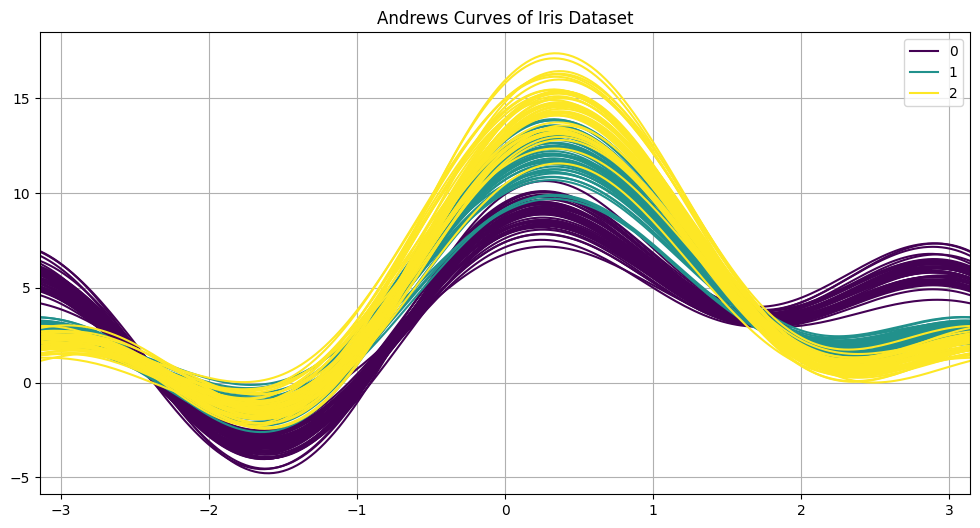

In [60]:
iris_numeric = iris_data.drop(columns=['species'])
iris_numeric['class'] = iris_data['species'].astype('category').cat.codes

plt.figure(figsize=(12, 6))
# Andrews Curves:
# - Each sample becomes a smooth function plotted across a common interval.
# - Useful for visualizing class separability in high-dimensional data.
# - Only numeric features can be used.
andrews_curves(
    iris_numeric,         # DataFrame with only numeric features and numeric class label
    'class',              # Label column for color grouping
    colormap='viridis'    # Use a smooth color gradient for class distinction
)
plt.title('Andrews Curves of Iris Dataset')
plt.grid(True)
plt.show()

Parallel Coordinates Plot

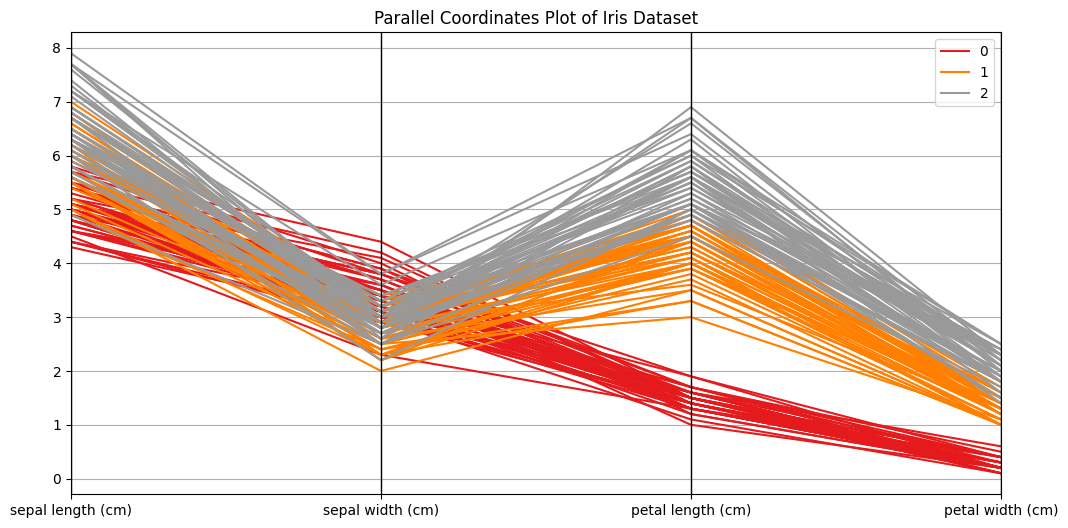

In [31]:
# Encode categorical class column to numeric values for compatibility
iris_encoded = iris_data.copy()
iris_encoded['class'] = iris_encoded['species'].astype('category').cat.codes
# Encode species to integers

plt.figure(figsize=(12, 6))
# Parallel Coordinates Plot:
# - Each vertical axis represents one feature
# - Each line represents a sample, colored by class (now numeric)
# - Useful to see feature trends across classes
parallel_coordinates(
    iris_encoded.drop(columns=['species']),  # Drop original species string column
    'class',                                # Use encoded numeric class labels
    colormap='Set1'                         # Use categorical color map
)
plt.title('Parallel Coordinates Plot of Iris Dataset')
plt.grid(True)
plt.show()

t-SNE Visualization

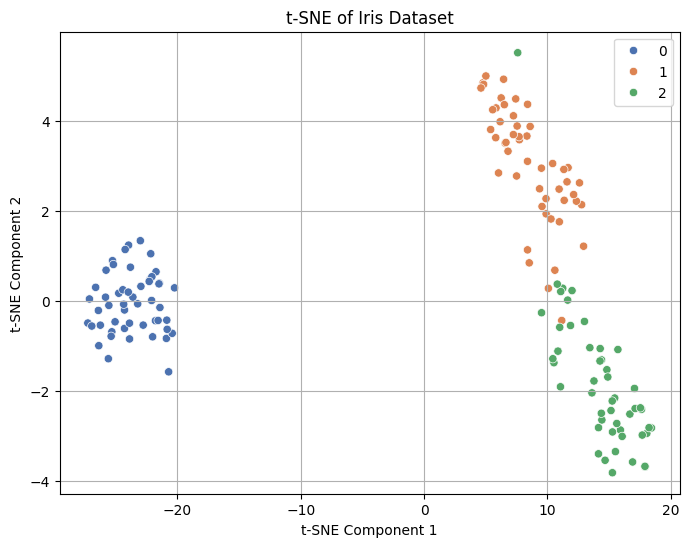

In [61]:
# t-SNE Visualization (t-SNE stands for t-distributed Stochastic Neighbor Embedding)
X_tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = X_tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y, palette='deep')
plt.title('t-SNE of Iris Dataset')
plt.grid(True)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [45]:
# kNN Evaluation Function (fixed value of k=5)
def evaluate_knn(metric, p=None):
    if metric == 'minkowski' and p is not None:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric, p=p)
        title = f'kNN with Minkowski Distance (p={p})'
    else:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
        title = f'kNN with {metric.capitalize()} Distance'

    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, target_names=target_names)

    print(f"\n\u2728 {title}")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:\n")
    print(report)

    df_plot = pd.DataFrame({
        "Actual": [target_names[i] for i in y_test],
        "Predicted": [target_names[i] for i in preds]
    })

    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_plot, x="Actual", hue="Predicted", palette="Set2")
    plt.title(f"{title} - Actual vs Predicted")
    plt.ylabel("Count")
    plt.grid(axis='y')
    plt.show()


✨ kNN with Minkowski Distance (p=2)
Accuracy: 1.00
Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



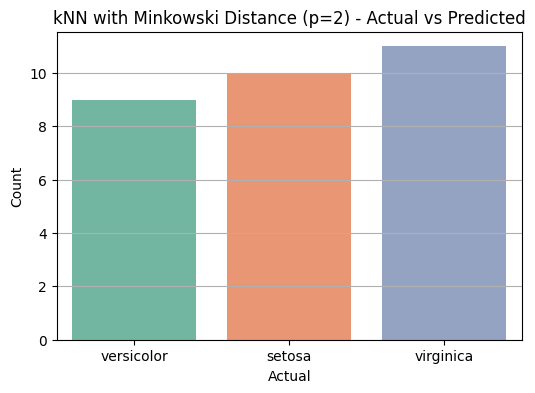


✨ kNN with Minkowski Distance (p=1)
Accuracy: 1.00
Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



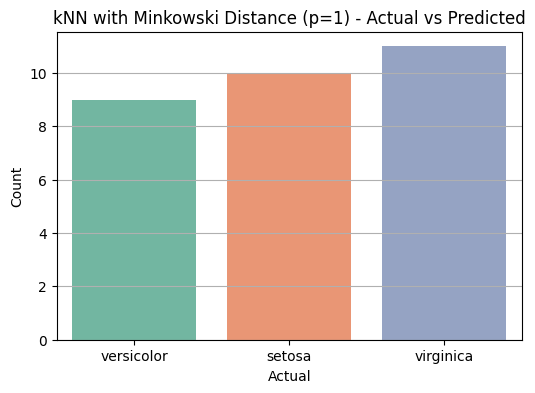


✨ kNN with Chebyshev Distance
Accuracy: 1.00
Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



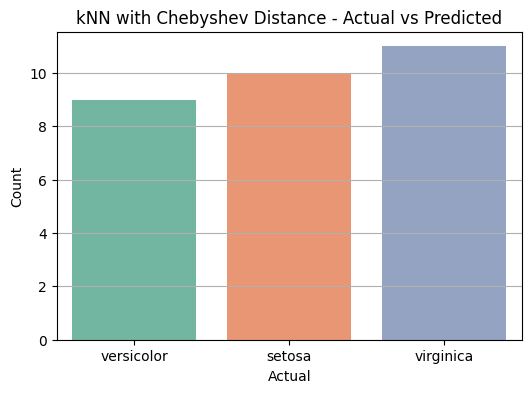

In [46]:
# Evaluate Metrics on Full Feature Set
evaluate_knn('minkowski', p=2)
evaluate_knn('minkowski', p=1)
evaluate_knn('chebyshev')


In [47]:
# Using Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
preds_log = log_model.predict(X_test)
print(" 📘 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, preds_log))
print(classification_report(y_test, preds_log, target_names=target_names))

# Visualize predictions from Logistic Regression
log_plot = pd.DataFrame({
    "Actual": [target_names[i] for i in y_test],
    "Predicted": [target_names[i] for i in preds_log]
})
plt.figure(figsize=(6, 4))
sns.countplot(data=log_plot, x="Actual", hue="Predicted", palette="coolwarm")
plt.title("Logistic Regression - Actual vs Predicted")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

 📘 Logistic Regression
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



📘 Support Vector Machine (SVM)
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



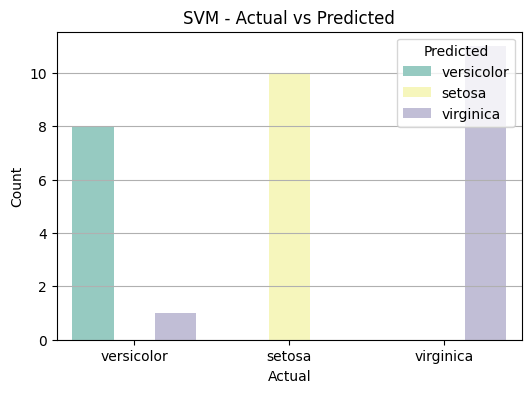

In [62]:
# Using SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
preds_svm = svm_model.predict(X_test)
print("📘 Support Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, preds_svm))
print(classification_report(y_test, preds_svm, target_names=target_names))

# Visualize predictions from SVM
svm_plot = pd.DataFrame({
    "Actual": [target_names[i] for i in y_test],
    "Predicted": [target_names[i] for i in preds_svm]
})
plt.figure(figsize=(6, 4))
sns.countplot(data=svm_plot, x="Actual", hue="Predicted", palette="Set3")
plt.title("SVM - Actual vs Predicted")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()



### Why is SVM Accuracy Slightly Lower (\~96.7%) Compared to kNN or Logistic Regression?

1. **SVM focuses on margin maximization, not memorization**

   * SVM tries to find the best boundary (hyperplane) that separates the classes with the largest possible margin.
   * To do this, it may misclassify a few points near the boundary in order to avoid overfitting.

2. **Overlap in the dataset**

   * The Iris dataset contains some overlap between the features of `versicolor` and `virginica`.
   * In this particular test set, it’s likely that one `versicolor` point was misclassified as `virginica`, causing a small drop in accuracy.

3. **SVM is sensitive to feature scaling**

   * Features like sepal length and petal width vary in scale.
   * SVM models typically perform better when all features are scaled (e.g., using `StandardScaler`).
   * If not scaled, the larger-range features can dominate the decision boundary.

4. **Why kNN and Logistic Regression did better**

   * `kNN` memorizes the training data and performs very well on clean, low-noise datasets like Iris.
   * Logistic Regression assumes linear separability, which mostly holds true for the Iris dataset.
   * Both models, especially `kNN`, can perform almost perfectly on this data.



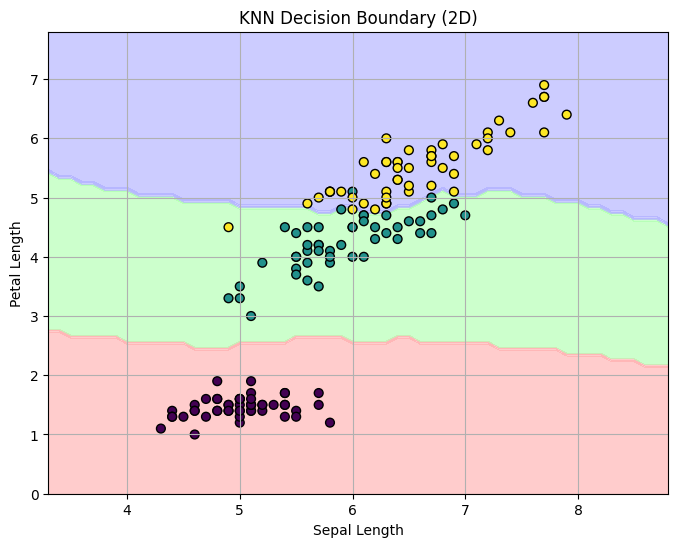

In [65]:
# ✅ Decision Boundary Plot using only 2 features: Sepal Length and Petal Length

# Extract only two features: Sepal Length (column 0) and Petal Length (column 2)
X_vis = iris_data.iloc[:, [0, 2]].values  # Shape: (150, 2)

# Convert species labels to numeric values for visualization purposes
y_vis = iris_data['species'].astype('category').cat.codes.values  # setosa=0, versicolor=1, virginica=2

# Create and train the kNN model (k=5) on the 2D feature space
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis)

# Determine the range of feature values to cover the entire plot area
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1  # Sepal Length range
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1  # Petal Length range

# Create a mesh grid (like a pixel canvas) covering the feature space
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),  # Step size of 0.1 for smooth contours
    np.arange(y_min, y_max, 0.1)
)

# Predict the class label for every point on the mesh grid using the trained kNN model
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
# Flatten the grid to pass into predict()
Z = Z.reshape(xx.shape)
# Reshape back to match the grid shape for contour plotting

# Plot the decision boundary
plt.figure(figsize=(8, 6))  # Set figure size

# Define background colors for the classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Fill the background regions according to the predicted class
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# Overlay the actual training points with black edges
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', s=40)
# s=40 sets marker size

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('KNN Decision Boundary (2D)')
plt.grid(True)
plt.show()
